In [1]:
! pip install mxnet-cu92
! pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789.8 MB 15 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 630 kB/s 
     |████████████████████████████████| 9.9 MB 15.6 MB/s 
     |████████████████████████████████| 61 kB 7.2 MB/s 
     |████████████████████████████████| 15.7 MB 26.4 MB/s 
     |████████████████████████████████| 11.2 MB 24.1 MB/s 
     |████████████████████████████████| 120 kB 34.2 MB/s 
     |████████████████████████████████| 960 kB 56.9 MB/s 
     |████████████████████████████████| 1.6 MB 53.4 MB/s 
     |████████████████████████████████| 82 kB 676 kB/s 
  Attempting uninstall: numpy
    Found existing installation: 

In [2]:
!pip install d2l==1.0.0-alpha1.post0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.1 MB/s 
  Attempting uninstall: d2l
    Found existing installation: d2l 0.17.5
    Uninstalling d2l-0.17.5:
      Successfully uninstalled d2l-0.17.5


# Intorudction
This notebook correpson to the bases of linear neural networks for regression 

## 3.1.1 Basics
Linear regression may be both the simplest and most popular among the standar tools for tackling regression problems. First we assume the relationship between features $x$ and $y$ is approximately linear, $Ε[Y|X=x]$ can be expressed as a weighted sum of features $x$. This setup allows that the target value may still deviate from following Gaussian distribution. Typically, we'll 
use $n$ to denote the number of examples in our data se. we use superscript to enumerate samples and targets, adn subscripys to index coordinates. More concretely, $x^{(i)}$ denote the 

### 3.1.1.1 Model
the assumption of linearity means tha the expected value of the target can be expresed as a weighted sum of the features: $W$ is the weight and $b$ is the bias, we can express these sum like: 
\begin{equation}
$ŷ= w_{1}x_{1}+..+w_{d}x_{d}+b$  \tag{1}
\end{equation}

Collection all features into a vector $x ϵ ℝ^{d}$ and all weights into a vector $w ϵ ℝ^{d}$. we can express the model like:
\begin{equation}
**$ŷ= w^Tx+b$** \tag{2}
\end{equation}
The vector $x$ corresponds to the features of a single example.While, we can refer of the entire dataset of $n$ examples via the design matrix $X ϵ ℝ^{n x d}$. Here $X$ contains one row for every example and one column for every feature. We can expressed via the matrix-vector product:
\begin{equation}
$ŷ= Xw+b$ \tag{3}
\end{equation}


### 3.1.1.2 Loss Function

Loss function quantify the distance between the real and predicted values of the target. The loss will usually be a non-negative number where smaller values are better and perfect prediction incur a loos of 0. For regression problems, the most common loss function is squared error.Can be expressed like:
\begin{equation}
$l^{i}(w,b)= 1/2 * (ŷ^{i}-y^{i})^{2}$ \tag{4}
\end{equation}

The constant $1/2$ makes no real difference but proves to be notationally convenient, since it cancels out when we take the derivative of the loss
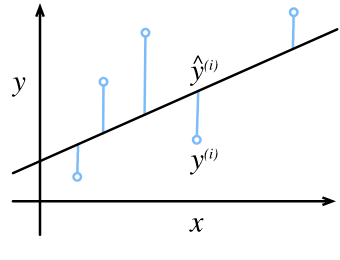


To measure the quality of a model on the entire dataset of $n$ examples, we simply average the losses on the training set, the eq is:

$L(w.b)=1/n ∑_{i=1}^{n} 1/2 (W^Tx^{i}+b -y^{i})^{2}$

When training the model, we want to find parameters $(w^*.b^*)$ that minimize the total loss acroos all training examples:

$w^*.b^* = argmin_{w,b} L(w,b)$

### 3.1.1.3 Analytic Solution

\begin{equation}

$∂_w||y-Xw||^2 =2 X^T(Xw-y)=o and hence X^Ty=X^TXw $ 

\end{equation}

solving $w$ provides us with the optimal solution for the optimization problem. . this solution is 
$w^* =(X^TX)^{-1}X^T$, 

will only be unique when the matrix $X^TX$ is invertible , when the columns of the design matrix are lineraly independent.



### 3.1.1.4 Minibatch Stochastic Gradient Descent
Applied SGD with the pross and cons


In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
import tensorflow as d2l
import matplotlib.pyplot as plt
# from d2l import tensorflow as d2l

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
n = 10000
a = tf.ones(n)
b = tf.ones(n)

In [ ]:
c = tf.Variable(tf.zeros(n))
t = time.time()
for i in range(n):
    c[i].assign(a[i] + b[i])
f'{time.time() - t:.5f} sec'

'6.88566 sec'

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00039 sec'

## The normal Distribution and Squared Loss

\begin{equation}
$p(x)=1/\sqrt[2]{2 \piθ^2}exp(-1/{2θ^2} (x-μ)^2)$
\end{equation}




In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

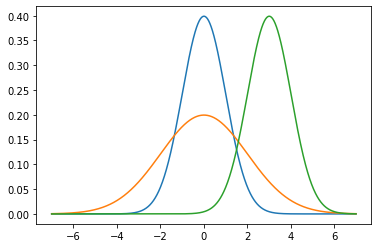

In [ ]:
x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
# plt.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])
for mu, sigma in params:
  plt.plot(x, normal(x, mu, sigma))


One way to motivate linear regression with squared loss is to assume that observations arise from noisy measurements, where the noise is normally distributed as follows:
$y=W^Tx +b +ϵ$  where $ϵ ~ Ŋ(0,θ^2)$

Now writing out the likelihhod of seeing a particular $y$ for a given $x$
\begin{equation}
$P(y|X)= 1/\sqrt[2]{2 \piθ^2}exp(-1/{2θ^2} (y-w^Tx-b)^2)$
\end{equation}

According to the principle of maximum likelihood, the best values of parameters $w$ and $b$ are those that maximize the likelihood of the entire dataset:

\begin{equation}
$P(y|X)=ℿ_{i=1}^n p(y^{i}|x^{i})$
\end{equation}

were drawn independently of each other. Estimators chosen according to the principle of maximum likelihood are called maximum likelihood estimators. While, maximizing the product of many exponential functions, might look difficult, we can simplify things significantly, without changing the objective, by maximizing the logarithm of the likelihood instead

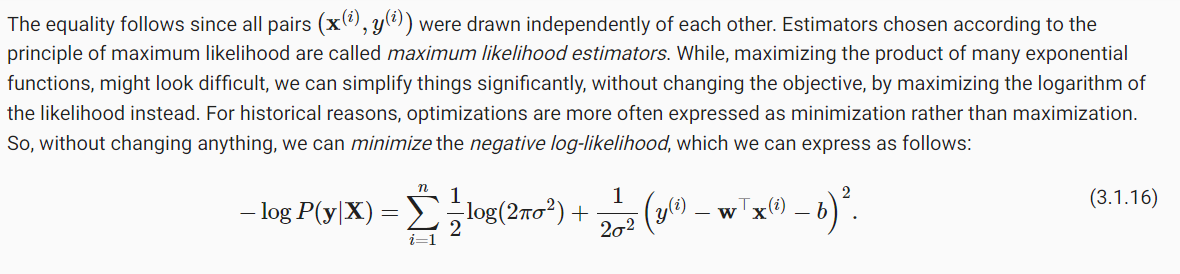